In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
data = pd.read_csv('/home/rahman/kuliah-workspace/videogame-sales-dataset/XboxOne_GameSales.csv',encoding = 'windows-1252')

In [3]:
data.columns

Index(['Pos', 'Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           505 non-null    float64
 3   Genre          613 non-null    object 
 4   Publisher      505 non-null    object 
 5   North America  613 non-null    float64
 6   Europe         613 non-null    float64
 7   Japan          613 non-null    float64
 8   Rest of World  613 non-null    float64
 9   Global         613 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
data.head(15)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
5,6,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,3.25,1.49,0.01,0.48,5.22
6,7,Battlefield 1,2016.0,Shooter,Electronic Arts,3.37,1.26,0.02,0.48,5.13
7,8,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.94,1.62,0.02,0.45,5.03
8,9,Halo 5: Guardians,2015.0,Shooter,Microsoft Studios,2.94,1.49,0.03,0.45,4.92
9,10,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,2.91,1.44,0.00,0.44,4.79


In [6]:
data.tail(15)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
598,599,Fe,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
599,600,We Sing (2016),2016.0,Music,THQ Nordic,0.0,0.0,0.0,0.0,0.0
600,601,Don Bradman Cricket 17,2016.0,Sports,Tru Blu Entertainment,0.0,0.0,0.0,0.0,0.0
601,602,Ace Combat 7: Skies Unknown,2019.0,Shooter,Bandai Namco Games,0.0,0.0,0.0,0.0,0.0
602,603,The Sexy Brutale,NaN,Adventure,NaN,0.0,0.0,0.0,0.0,0.0
603,604,Metro Exodus,2019.0,Shooter,Deep Silver,0.0,0.0,0.0,0.0,0.0
604,605,Anthem,2019.0,Role-Playing,Electronic Arts,0.0,0.0,0.0,0.0,0.0
605,606,AereA,2017.0,Role-Playing,Soedesco,0.0,0.0,0.0,0.0,0.0
606,607,Moons Of Madness,2018.0,Role-Playing,Unknown,0.0,0.0,0.0,0.0,0.0
607,608,Iron Harvest,2018.0,Strategy,Unknown,0.0,0.0,0.0,0.0,0.0


In [7]:
data.Publisher.unique()

array(['Rockstar Games', 'Activision', 'Microsoft Studios',
       'Electronic Arts', 'Bethesda Softworks', 'Ubisoft', 'EA Sports',
       'Blizzard Entertainment', '2K Sports',
       'Warner Bros. Interactive Entertainment', 'Namco Bandai Games',
       'Square Enix', '505 Games', '2K Games', 'Capcom',
       'Konami Digital Entertainment', 'Mojang', 'Gearbox Software',
       'Harmonix Music Systems', 'Take-Two Interactive',
       'Disney Interactive Studios', 'Sega', 'Studio Wildcard',
       'Bandai Namco Games', 'Focus Home Interactive', 'Deep Silver',
       'Rebellion Developments', 'Telltale Games', 'Gun Media',
       'Codemasters', 'Majesco Entertainment', 'Koch Media', 'Astragon',
       nan, 'City Interactive', 'Sold Out', 'Tecmo Koei',
       'Insomniac Games', 'THQ Nordic', 'Milestone S.r.l.',
       'Dusenberry Martin Racing', 'Soedesco', 'Koei Tecmo',
       'Bigben Interactive', 'Milestone', 'Milestone S.r.l',
       'Frontier Developments', 'Nordic Games', 'PQube', 

In [8]:
data.Genre.unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Misc', 'Role-Playing',
       'Racing', 'Sports', 'Fighting', 'Adventure', 'MMO', 'Music',
       'Simulation', 'Strategy', 'Platform', 'Puzzle', 'Visual Novel'],
      dtype=object)

/home/rahman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rahman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


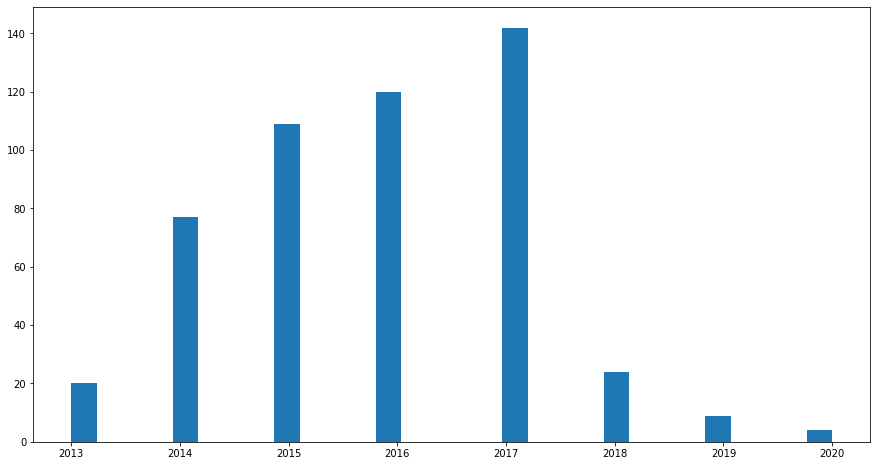

In [9]:
plt.subplots(figsize = (15,8))
plt.hist(data.Year,bins = 30)
plt.show()

In [10]:
rockstar = data[data.Publisher == 'Rockstar Games']
activision = data[data.Publisher == 'Activision']
mic = data[data.Publisher == 'Microsoft Studios']
bethesda = data[data.Publisher == 'Bethesda Softworks']

In [11]:
rockstar.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
179,180,L.A. Noire,2017.0,Adventure,Rockstar Games,0.14,0.09,0.00,0.02,0.25


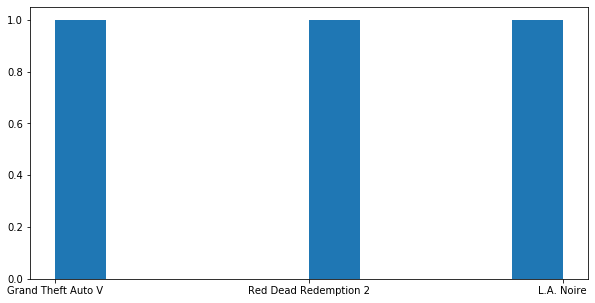

In [62]:
plt.subplots(figsize = (10,5))
plt.hist(rockstar.Game, bins = 10)
plt.show()

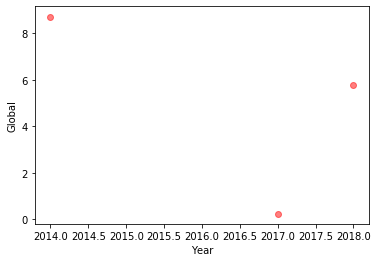

In [13]:
plt.scatter(rockstar.Year,rockstar['Global'],color = 'red',alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Global')
plt.show()

In [14]:
activision.head(20)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
5,6,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,3.25,1.49,0.01,0.48,5.22
9,10,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,2.91,1.44,0.00,0.44,4.79
16,17,Destiny,2014.0,Shooter,Activision,2.17,0.92,0.00,0.32,3.41
21,22,Call of Duty: Ghosts,2013.0,Shooter,Activision,1.92,0.86,0.00,0.28,3.07
30,31,Destiny 2,2017.0,Shooter,Activision,1.66,0.47,0.00,0.23,2.35
64,65,Destiny: The Taken King,2015.0,Shooter,Activision,0.91,0.23,0.00,0.12,1.27
85,86,Guitar Hero Live,2015.0,Music,Activision,0.52,0.23,0.00,0.08,0.83
139,140,Skylanders: Trap Team,2014.0,Platform,Activision,0.34,0.07,0.00,0.04,0.45


In [15]:
activision.tail()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
340,341,King's Quest: The Complete Collection,2016.0,Adventure,Activision,0.04,0.0,0.0,0.01,0.05
380,381,Geometry Wars 3: Dimensions Evolved,2016.0,Action,Activision,0.02,0.0,0.0,0.00,0.02
427,428,The Peanuts Movie: Snoopy's Grand Adventure,2015.0,Platform,Activision,0.00,0.0,0.0,0.00,0.00
431,432,The Amazing Spider-Man 2,2014.0,Misc,Activision,0.00,0.0,0.0,0.00,0.00
546,547,The Legend of Korra (2014),2014.0,Action,Activision,0.00,0.0,0.0,0.00,0.00


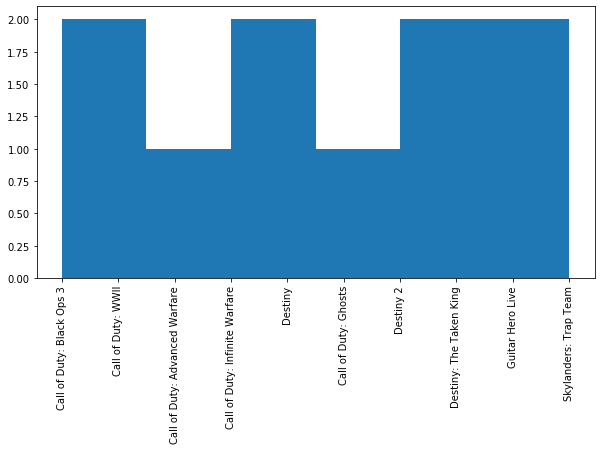

In [61]:
plt.subplots(figsize = (10,5))
plt.hist(activision.Game.head(10),bins = 6)
plt.xticks(rotation = 90)
plt.show()

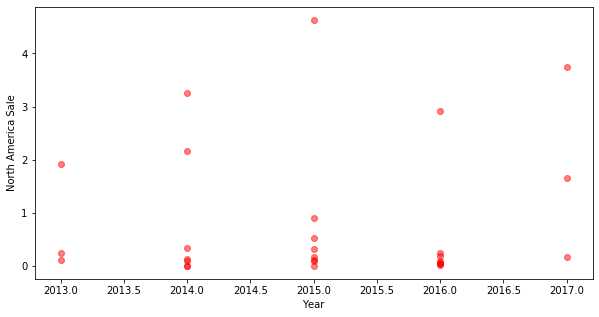

In [17]:
plt.subplots(figsize = (10,5))
plt.scatter(activision.Year,activision['North America'],color = 'red',alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('North America Sale')
plt.show()

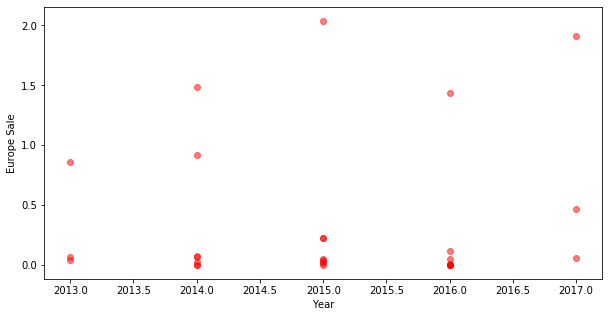

In [18]:
plt.subplots(figsize = (10,5))
plt.scatter(activision.Year,activision['Europe'],color = 'red',alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Europe Sale')
plt.show()

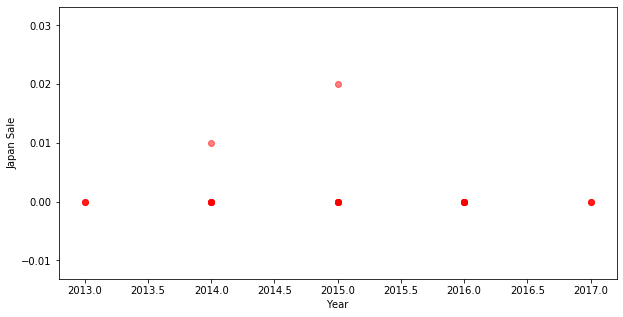

In [19]:
plt.subplots(figsize = (10,5))
plt.scatter(activision.Year,activision.Japan,color = 'red',alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Japan Sale')
plt.show()

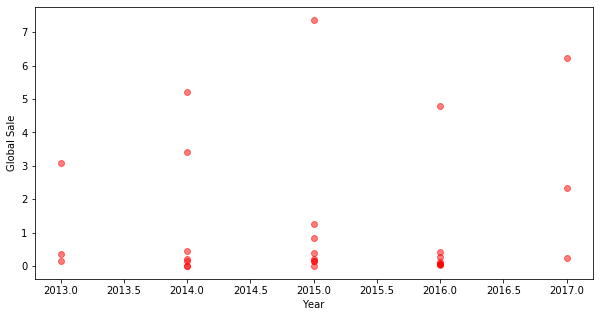

In [20]:
plt.subplots(figsize = (10,5))
plt.scatter(activision.Year,activision.Global,color = 'red',alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Global Sale')
plt.show()

In [21]:
mic.head(10)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
8,9,Halo 5: Guardians,2015.0,Shooter,Microsoft Studios,2.94,1.49,0.03,0.45,4.92
11,12,Forza Horizon 3,2016.0,Racing,Microsoft Studios,1.64,1.96,0.02,0.32,3.93
13,14,Gears of War: Ultimate Edition,2015.0,Shooter,Microsoft Studios,2.88,0.37,0.00,0.37,3.62
15,16,Halo: The Master Chief Collection,2014.0,Shooter,Microsoft Studios,2.06,1.04,0.03,0.31,3.44
17,18,Gears of War 4,2016.0,Shooter,Microsoft Studios,2.17,0.90,0.00,0.32,3.38
29,30,Forza Motorsport 5,2013.0,Racing,Microsoft Studios,1.28,0.90,0.01,0.21,2.40
33,34,PlayerUnknown's Battlegrounds,2017.0,Shooter,Microsoft Studios,1.29,0.69,0.00,0.20,2.17
36,37,Forza Motorsport 6,2015.0,Racing,Microsoft Studios,0.90,0.92,0.04,0.16,2.02
47,48,Dead Rising 3,2013.0,Action,Microsoft Studios,1.06,0.40,0.01,0.15,1.63


In [22]:
mic.tail(10)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
177,178,ReCore,2016.0,Action-Adventure,Microsoft Studios,0.16,0.06,0.01,0.02,0.26
195,196,Super Lucky's Tale,2017.0,Platform,Microsoft Studios,0.13,0.07,0.00,0.02,0.22
199,200,State of Decay,2015.0,Action-Adventure,Microsoft Studios,0.14,0.05,0.00,0.02,0.21
216,217,Project Spark (Working Title),2014.0,Misc,Microsoft Studios,0.11,0.05,0.00,0.02,0.17
217,218,Rush: A Disney Pixar Adventure,2017.0,Adventure,Microsoft Studios,0.15,0.00,0.00,0.02,0.17
262,263,Killer Instinct (2013),2014.0,Fighting,Microsoft Studios,0.07,0.03,0.00,0.01,0.11
298,299,Disneyland Adventures,2017.0,Action-Adventure,Microsoft Studios,0.05,0.01,0.00,0.01,0.07
418,419,ScreamRide,2015.0,Simulation,Microsoft Studios,0.00,0.01,0.00,0.00,0.01
490,491,Fable Legends,2019.0,Role-Playing,Microsoft Studios,0.00,0.00,0.00,0.00,0.00
535,536,Crackdown 3,2019.0,Action,Microsoft Studios,0.00,0.00,0.00,0.00,0.00


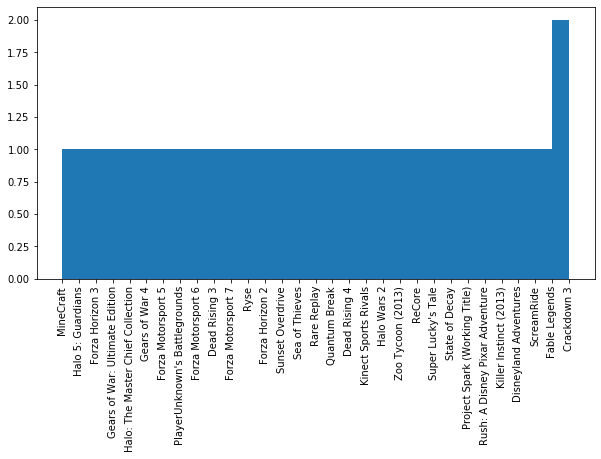

In [23]:
plt.subplots(figsize = (10,5))
plt.hist(mic.Game,bins = 30)
plt.xticks(rotation = 90)
plt.show()

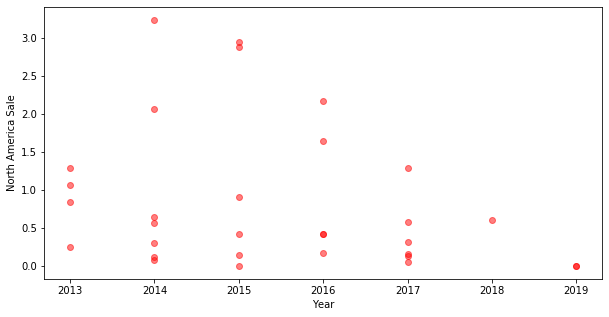

In [59]:
plt.subplots(figsize = (10,5))
plt.scatter(mic.Year,mic['North America'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('North America Sale')
plt.show()

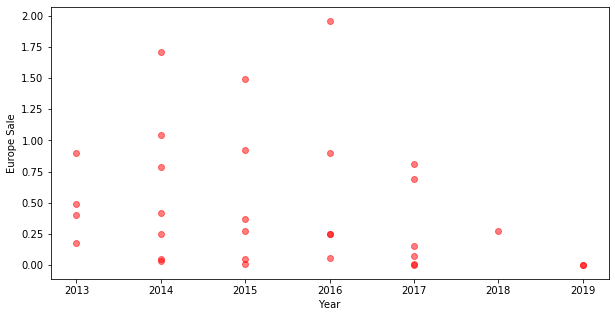

In [25]:
plt.subplots(figsize = (10,5))
plt.scatter(mic.Year,mic['Europe'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('Europe Sale')
plt.show()

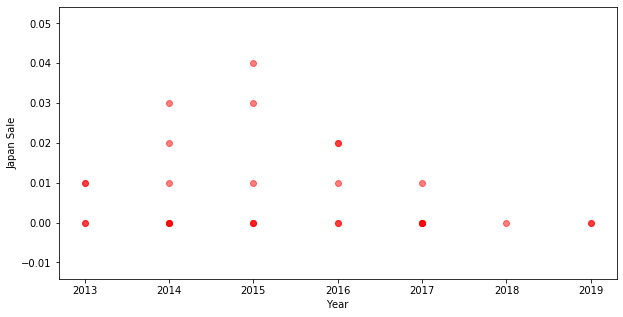

In [26]:
plt.subplots(figsize = (10,5))
plt.scatter(mic.Year,mic['Japan'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('Japan Sale')
plt.show()

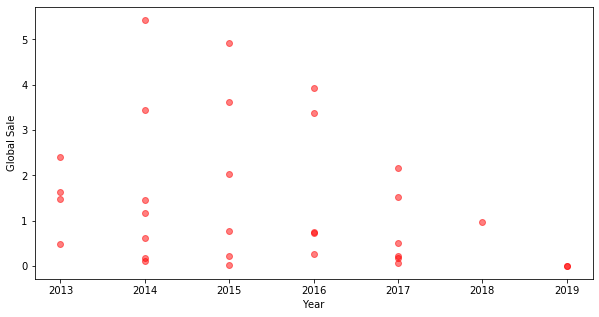

In [27]:
plt.subplots(figsize = (10,5))
plt.scatter(mic.Year,mic['Global'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('Global Sale')
plt.show()

In [28]:
bethesda.head(10)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
7,8,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.94,1.62,0.02,0.45,5.03
40,41,The Elder Scrolls V: Skyrim,2016.0,Role-Playing,Bethesda Softworks,1.13,0.53,0.00,0.17,1.83
56,57,Doom (2016),2016.0,Shooter,Bethesda Softworks,0.76,0.57,0.00,0.13,1.45
60,61,The Elder Scrolls Online,2015.0,MMO,Bethesda Softworks,0.86,0.39,0.00,0.13,1.38
81,82,Dishonored 2,2016.0,Action,Bethesda Softworks,0.47,0.31,0.00,0.08,0.86
93,94,Wolfenstein: The New Order,2014.0,Shooter,Bethesda Softworks,0.39,0.30,0.00,0.06,0.75
103,104,Wolfenstein II: The New Colossus,2017.0,Shooter,Bethesda Softworks,0.45,0.19,0.00,0.07,0.70
104,105,The Evil Within,2014.0,Misc,Bethesda Softworks,0.36,0.27,0.00,0.06,0.69
138,139,Prey (2017),2017.0,Shooter,Bethesda Softworks,0.21,0.20,0.00,0.04,0.45
151,152,The Evil Within II,2017.0,Action,Bethesda Softworks,0.25,0.10,0.00,0.04,0.39


In [29]:
bethesda.tail(10)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
93,94,Wolfenstein: The New Order,2014.0,Shooter,Bethesda Softworks,0.39,0.30,0.0,0.06,0.75
103,104,Wolfenstein II: The New Colossus,2017.0,Shooter,Bethesda Softworks,0.45,0.19,0.0,0.07,0.70
104,105,The Evil Within,2014.0,Misc,Bethesda Softworks,0.36,0.27,0.0,0.06,0.69
138,139,Prey (2017),2017.0,Shooter,Bethesda Softworks,0.21,0.20,0.0,0.04,0.45
151,152,The Evil Within II,2017.0,Action,Bethesda Softworks,0.25,0.10,0.0,0.04,0.39
205,206,Dishonored,2015.0,Action,Bethesda Softworks,0.13,0.05,0.0,0.02,0.19
224,225,Wolfenstein: The Old Blood,2015.0,Shooter,Bethesda Softworks,0.07,0.07,0.0,0.01,0.15
236,237,Dishonored: Death of the Outsider,2017.0,Action,Bethesda Softworks,0.07,0.06,0.0,0.01,0.14
238,239,The Elder Scrolls Online: Morrowind,2017.0,MMO,Bethesda Softworks,0.09,0.03,0.0,0.01,0.14
251,252,Wolfenstein The Two Pack,2017.0,Shooter,Bethesda Softworks,0.11,0.00,0.0,0.01,0.12


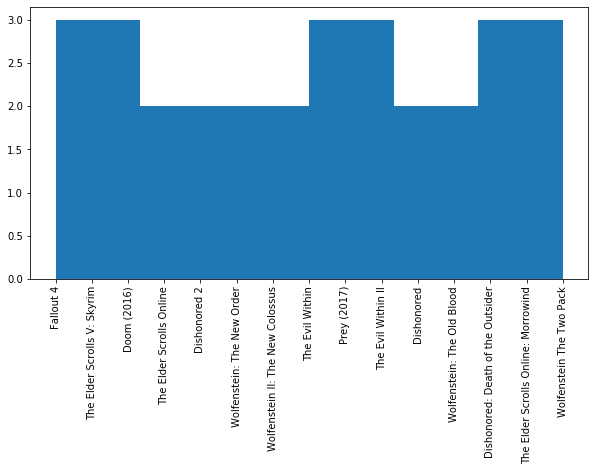

In [54]:
plt.subplots(figsize = (10,5))
plt.hist(bethesda.Game,bins = 6)
plt.xticks(rotation = 90)
plt.show()

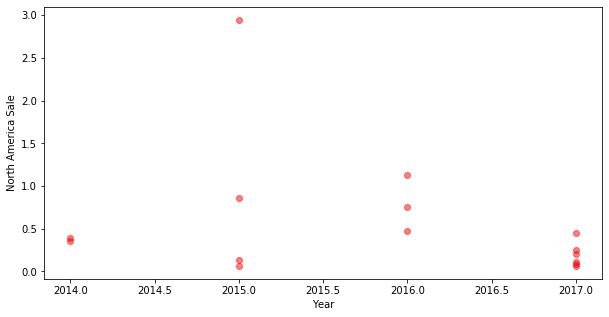

In [31]:
plt.subplots(figsize = (10,5))
plt.scatter(bethesda.Year,bethesda['North America'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('North America Sale')
plt.show()

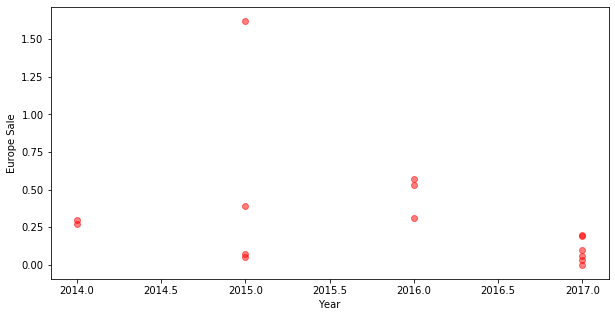

In [32]:
plt.subplots(figsize = (10,5))
plt.scatter(bethesda.Year,bethesda['Europe'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('Europe Sale')
plt.show()

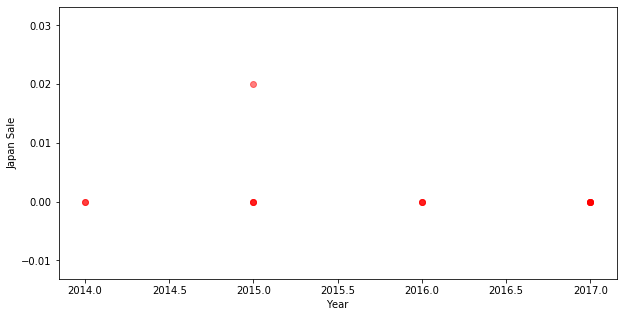

In [33]:
plt.subplots(figsize = (10,5))
plt.scatter(bethesda.Year,bethesda['Japan'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('Japan Sale')
plt.show()

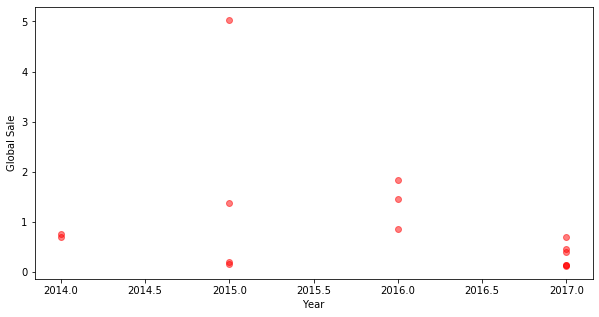

In [34]:
plt.subplots(figsize = (10,5))
plt.scatter(bethesda.Year,bethesda['Global'],alpha = 0.5,color = 'red')
plt.xlabel('Year')
plt.ylabel('Global Sale')
plt.show()

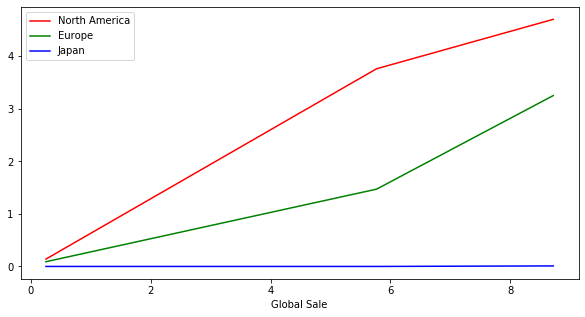

In [35]:
plt.subplots(figsize = (10,5))
plt.plot(rockstar.Global,rockstar['North America'],color = 'red',label = 'North America')
plt.plot(rockstar.Global,rockstar['Europe'],color = 'green',label = 'Europe')
plt.plot(rockstar.Global,rockstar['Japan'],color = 'blue',label = 'Japan')
plt.legend()
plt.xlabel('Global Sale')
plt.show()

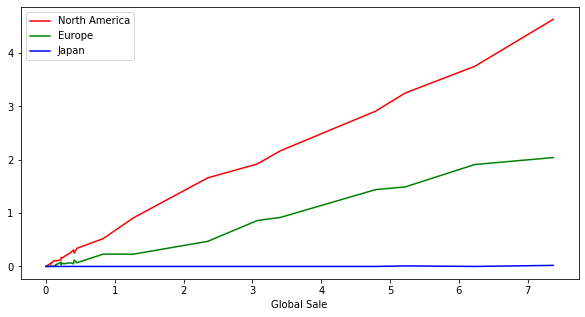

In [36]:
plt.subplots(figsize = (10,5))
plt.plot(activision.Global,activision['North America'],color = 'red',label = 'North America')
plt.plot(activision.Global,activision['Europe'],color = 'green',label = 'Europe')
plt.plot(activision.Global,activision['Japan'],color = 'blue',label = 'Japan')
plt.legend()
plt.xlabel('Global Sale')
plt.show()

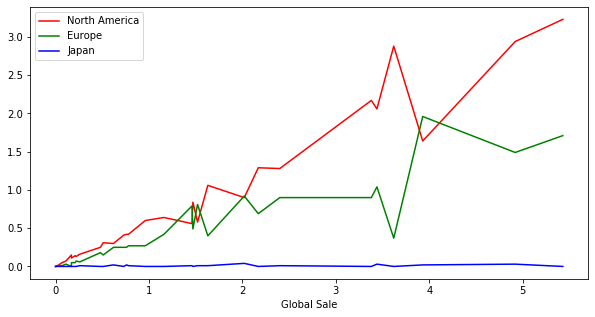

In [37]:
plt.subplots(figsize = (10,5))
plt.plot(mic.Global,mic['North America'],color = 'red',label = 'North America')
plt.plot(mic.Global,mic['Europe'],color = 'green',label = 'Europe')
plt.plot(mic.Global,mic['Japan'],color = 'blue',label = 'Japan')
plt.legend()
plt.xlabel('Global Sale')
plt.show()

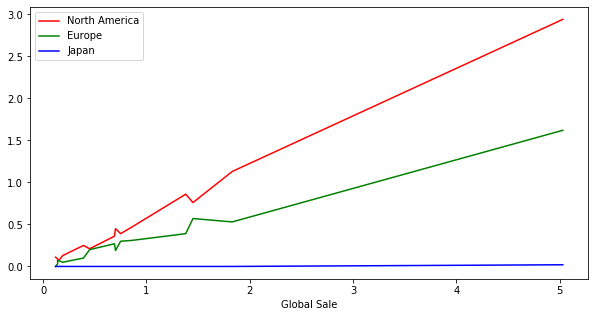

In [38]:
plt.subplots(figsize = (10,5))
plt.plot(bethesda.Global,bethesda['North America'],color = 'red',label = 'North America')
plt.plot(bethesda.Global,bethesda['Europe'],color = 'green',label = 'Europe')
plt.plot(bethesda.Global,bethesda['Japan'],color = 'blue',label = 'Japan')
plt.legend()
plt.xlabel('Global Sale')
plt.show()

dari data xboxOne game sale yang sudah ada dan di visualisasikan ditadapatkan bahwa penjualan game terbessa terjadi pada tahun 2015 sampai tahun 2017 dan terjadi penurunan yang sangat signifikan pada tahun 2018 keata game studio dari game xboxOne yang stabil dan yang banyak di pasar global adalah game studio Rockstar Games.